In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [39]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
data = pd.read_csv("/content/Product Review Dataset.csv")
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154467 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154467 non-null  object
 1   product_price  154467 non-null  object
 2   Rate           154467 non-null  object
 3   Review         154467 non-null  object
 4   Summary        154467 non-null  object
 5   Sentiment      154467 non-null  object
dtypes: object(6)
memory usage: 8.2+ MB


In [74]:
data.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,154467,154467,154467,154467,154467,154467
unique,841,479,8,1324,85306,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,4362,6859,88726,7623,6784,122808


# Data Preprocessing

In [41]:
data.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [42]:
data = data.dropna()
data.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [43]:
data.nunique()

product_name       841
product_price      479
Rate                 8
Review            1324
Summary          85306
Sentiment            3
dtype: int64

In [44]:
data_duplicated = data.duplicated().sum()
print(data_duplicated)

25912


In [46]:
data.drop_duplicates(inplace=True)

In [47]:
data_duplicated = data.duplicated().sum()
print(data_duplicated)

0


In [51]:
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

positive    122808
negative     23353
neutral       8306
Name: Sentiment, dtype: int64


In [22]:
data['Review'] = data['Review'].apply(lambda x: x.lower())
data['Review'] = data['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [24]:
data['Review']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205045           terrific
205046     classy product
205049               nice
205050           just wow
205051      valueformoney
Name: Review, Length: 154467, dtype: object

In [27]:
feature_counts = data['Review'].value_counts()
feature_counts

wonderful                                         7623
not specified                                     5714
great product                                     4816
brilliant                                         4807
awesome                                           4797
                                                  ... 
no 1 worst product                                   1
50  50                                               1
really bad product worst service from flipkart       1
nice mixer  nice price                               1
product looking very nice  strong quality            1
Name: Review, Length: 1263, dtype: int64

In [65]:
data['Rate'].value_counts()

5                                                                    88726
4                                                                    30484
1                                                                    17475
3                                                                    12500
2                                                                     5279
Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)             1
Bajaj DX 2 L/W Dry Iron                                                  1
Nova Plus Amaze NI 10 1100 W Dry Iron?ÃÂ¿?ÃÂ¿(Grey & Turquoise)        1
Name: Rate, dtype: int64

# DATA VISUALIZATION

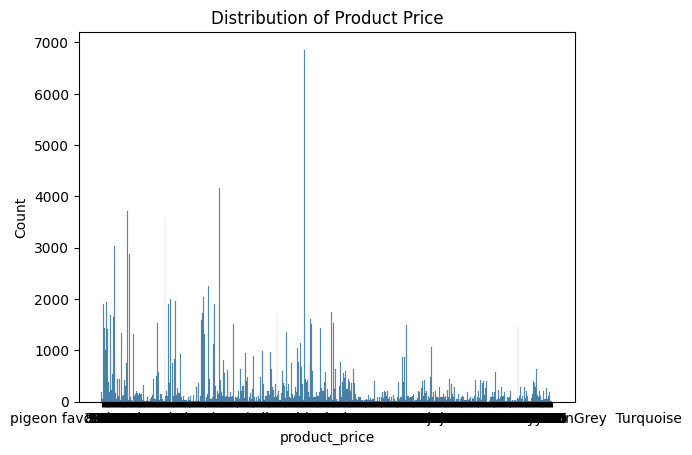

In [66]:
# Explore the distribution of numerical variables
sns.histplot(data['product_price'])
plt.title('Distribution of Product Price')
plt.show()

<ipython-input-80-37d43003f4fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='pastel')


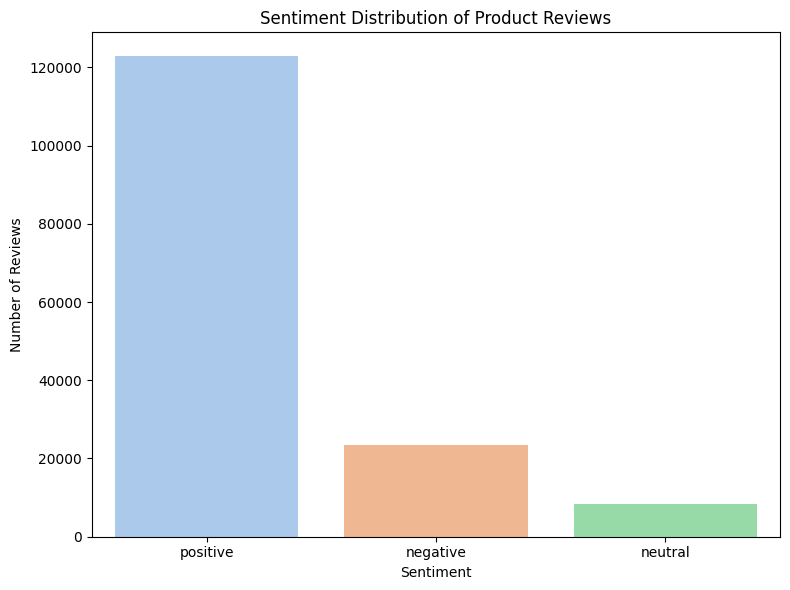

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='pastel')
plt.title('Sentiment Distribution of Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks()
plt.tight_layout()
plt.show()

# SENTIMENT ANALYSIS

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Sentiment'], test_size=0.2, random_state=42)

In [28]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [31]:
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [32]:
y_pred = model.predict(X_test_vectorized)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [37]:
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.9148741545625901
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.78      0.82      4877
     neutral       0.40      0.00      0.00      1695
    positive       0.92      0.99      0.96     29504

    accuracy                           0.91     36076
   macro avg       0.73      0.59      0.59     36076
weighted avg       0.89      0.91      0.89     36076

